In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Путь к папке с фаилами
DATA_PATH = 'C:\\Users\\Tsebom\\Documents\\MyProject\\homework4_1\\.ipynb_checkpoints\\Data\\'

In [3]:
def read_file(file_):
    """
    Возвращает содержимое фаила
    """
    rezult = pd.read_csv(''.join([DATA_PATH, 'yob', str(file_), '.txt']), names=['Name','Sex','Quantity'])
    return rezult

In [4]:
def range_year(first_year, last_year, step_year):
    """
    Возвращает списки имен по годам от first_year до (last_year + 1) с шагом step_year
    """
    data = {}
    for year in range(first_year, last_year, step_year):
        data[year] = pd.read_csv(''.join([DATA_PATH, 'yob', str(year), '.txt']), names=['Name','Sex','Quantity'])
    
    rezult = pd.concat(data, names=['Year', 'Pozition'])
    
    return rezult


ЗАДАНИЕ №1



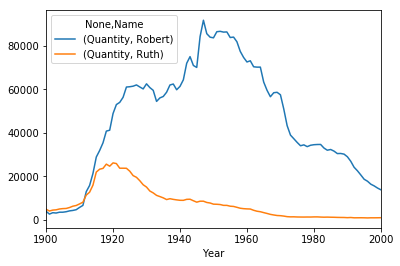

In [5]:
data = range_year(1900, 2001, 1)
data = data. groupby([data.index.get_level_values(0), 'Name']).sum()
print('\nЗАДАНИЕ №1\n')
data.query('Name == ["Ruth", "Robert"]').unstack('Name').plot()



ЗАДАНИЕ №2



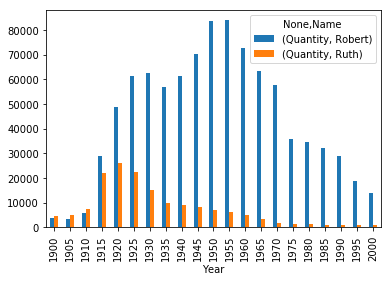

In [6]:
data = range_year(1900, 2001, 5)
data = data. groupby([data.index.get_level_values(0), 'Name']).sum()
print('\nЗАДАНИЕ №2\n')
data.query('Name == ["Ruth", "Robert"]').unstack('Name').plot.bar()


ЗАДАНИЕ №3



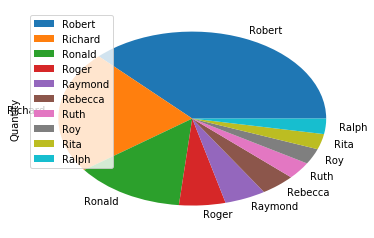

In [13]:
top = read_file(1950)
top = top[top.Name.str.startswith('R')]
top = top.groupby('Name').sum().sort_values(by='Quantity', ascending=False).head(10)
print('\nЗАДАНИЕ №3\n')
top.plot.pie(y='Quantity')

In [112]:
def consonants(word):
    """
    Возвращает количество согласных в слове
    """
    consonants = 0
    for letter in word.lower():
        if letter == "a" or letter == "e" or letter == "i" or letter == "o" or letter == "u" or letter == "y":
            continue
        else:
            consonants += 1
            
    return consonants

In [157]:
def range_name(first_year, last_year, step_year):
    """
    Возвращает общий список имен за период от first_year до (last_year + 1) с шагом step_year
    """
    rezult = pd.read_csv(''.join([DATA_PATH, 'yob', str(first_year), '.txt']), names=['Name','Sex','Quantity'])
    for year in range(first_year + 1, last_year, step_year):
        data = pd.read_csv(''.join([DATA_PATH, 'yob', str(year), '.txt']), names=['Name','Sex','Quantity'])
        rezult = pd.concat([rezult, data])
    
    return rezult


ЗАДАНИЕ №4



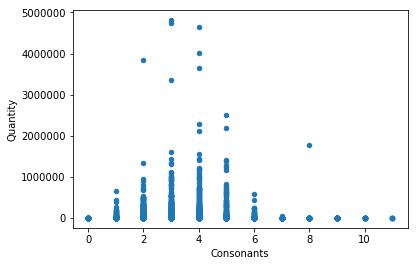

In [164]:
data = range_name(1900, 2001, 1)
data = data. groupby('Name').sum() # Групируем по именам
data['Name'] = data.index.get_level_values(0) # Возвращаем колонку с именами
data['Consonants'] = data.Name.apply(consonants) # Считаем количество согласных
print('\nЗАДАНИЕ №4\n')
data.plot.scatter(y='Quantity', x='Consonants')